# Part 1: Rankine Vortex

## Vortex Velocity as a Function of $r$

The vertical component of vorticity in polar coordinates is:

$$ \omega_z = \frac{1}{r} \frac{\partial}{\partial r} \left(r u_\theta \right) - \frac{1}{r} \frac{\partial u_r}{\partial \theta}$$

Taking $\frac{\partial u_r}{\partial \theta} = 0$ since the vortex is axissymmetric, we get:

$$ \omega_z = \frac{\partial}{\partial r} \left(r u_\theta \right) $$

For $ r \leq R $, $\omega_z(r) = \omega_0$, and we can derive:

$$ \begin{split}
\int_0^r r \omega_0 dr &= \int_0^r \frac{\partial}{\partial r} \left(r u_\theta \right) dr \\
\frac{1}{2}r^2 \omega_z &= r u_\theta \\
u_\theta &= \frac{r \omega_0}{2}
\end{split}$$

For $ r > R $, we assume $\omega_z(r) = 0$, and in that case have:

$$ \begin{split}

\int  dr &= \int \frac{\partial}{\partial r} \left(r u_\theta \right) dr \\
C &= r u_\theta \\
u_\theta &= \frac{C}{r}

\end{split}
$$

Note that this is equivalent to saying $ r u_\theta $ is constant with respect to r, which makes sense, because that is angular velocity, which we expect to be constant.

Combining these two cases, we get:

$$ u_\theta(r) = \begin{cases}
\frac{1}{2}r \omega_0 & r \leq R \\
\frac{C}{r} & r > R
\end{cases}
$$

## Material Volume Sketch

The sketch below shows the evolution of two material volumes, one inside the vortex core and one outside from time $ t = t_1 $ to $ t = t_2 $ with $ t_2 > t_1 $ and the circulation of the vortex, $ \Gamma > 0 $. We observe that the volume in the core both rotates and revolves around the vortex axis, while the volume outside the core purely revolves around the vortex center, with no rotation.

<img src='material_volumes.jpg' width=1000></img>

## Infinitesimally Small Vortex Core

If we shrink the vortex core to be infinitesimally small, then the velocity function becomes that of an idealized point vortex, except at the vortex core, where the Rankine Vortex velocity is 0, while the point vortex velocity blows up to infinity.

# Part 2

Note: key code in the `hw5` module for `VortexManager` and `animate` is attached at the end of this assignment.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from hw5 import VortexManager, animate

In [2]:
import ipympl
%matplotlib widget

## Dipole

In [3]:
dt = 0.1

x = np.linspace(0, 6, 50)
y = np.linspace(0, 3, 25)

When the vortices have the same circulation, they revolve around each other, thus revolving around their centerpoint.

(2, 2, 101)


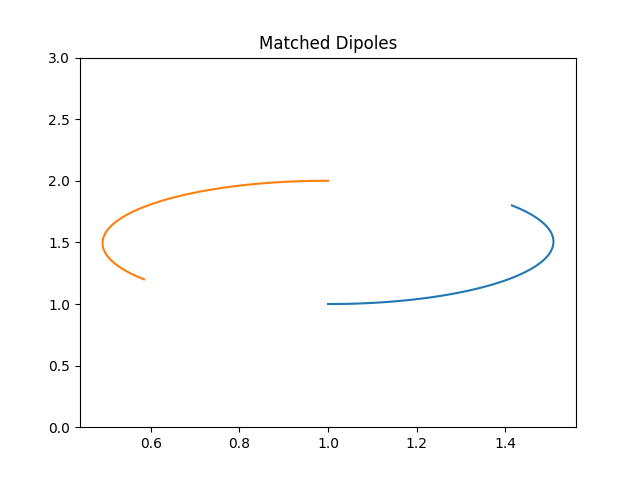

In [ ]:
dipole = VortexManager(2)
v1 = dipole.add(1, 1, 1)
v2 = dipole.add(1, 2, 1)

# anim = animate(dipole,  x, y, dt, figsize=(9, 3), duration=250)
# anim.save('./dipole_advection.gif')

fig, ax = plt.subplots()
points = dipole.step_forward(dt, 100)   
print(points.shape)
for point in points:
    ax.plot(*point)

# plt.tight_layout()
ax.set_ylim((0,3))
plt.title('Matched Dipoles')
plt.show()

Below we see the paths of two counterrotating vortices advecting each other in a straight line.

(2, 2, 1001)


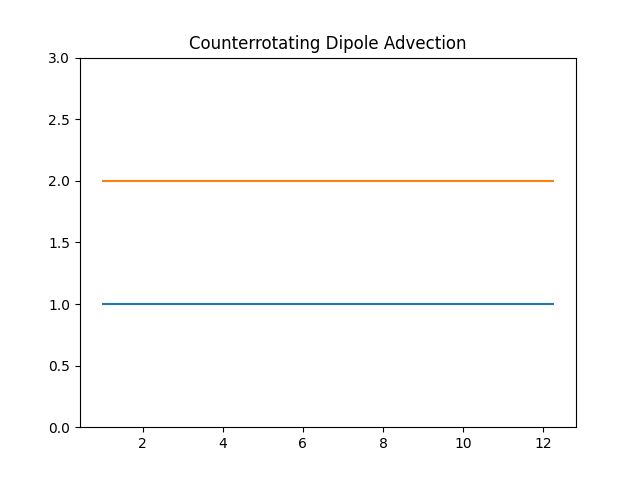

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

In [5]:
dipole_adv = VortexManager(2)
v1 = dipole_adv.add(1, 1, -1)
v2 = dipole_adv.add(1, 2, 1)

# anim = animate(dipole,  x, y, dt, figsize=(9, 3), duration=250)
# anim.save('./dipole_advection.gif')

fig, ax = plt.subplots()
points = dipole_adv.step_forward(dt, 1000)
print(points.shape)
for point in points:
    ax.plot(*point)

# plt.tight_layout()
ax.set_ylim((0,3))
plt.title('Counterrotating Dipole Advection')
plt.show()

If one of the vortices has a greater circulation, we see that the other begins to revolve around it, and they both take a elliptical path. Instead of revolving around their average position like we saw in the first dipole with same-sign circulation, in this case they revolve around a point elsewhere (methinks it is the average of their positions weighted by their circulations).

(2, 2, 201)


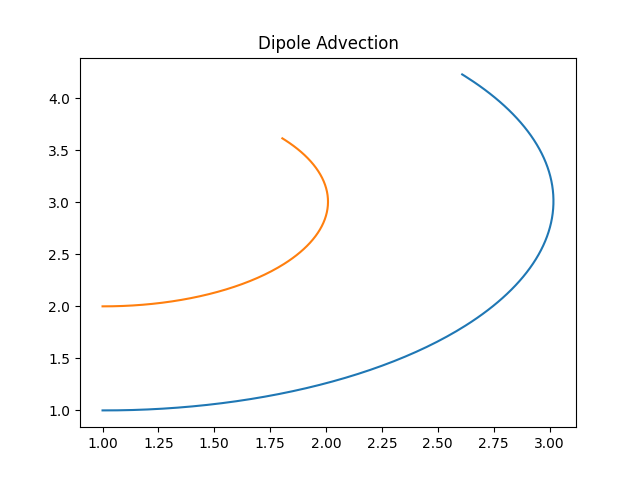

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

In [6]:
unbalanced = VortexManager(2)
v1 = unbalanced.add(1, 1, -1)
v2 = unbalanced.add(1, 2, 2)

# anim = animate(unbalanced,  x, y, dt, figsize=(9, 3), duration=250)
# anim.save('./dipole_advection.gif')

fig, ax = plt.subplots()
points = unbalanced.step_forward(dt, 200)
print(points.shape)
for point in points:
    ax.plot(*point)

# plt.tight_layout()
# ax.set_ylim((0,3))
plt.title('Dipole Advection')
plt.show()

## Corner Boundaries

Here we see the velocity field created by a vortex at point $(9, 1)$, equidistant from both walls forming a corner at $(10, 10)$. Velocity is essentially parallel to the walls, especially so along the lines connecting the point to the walls perpendicularly.

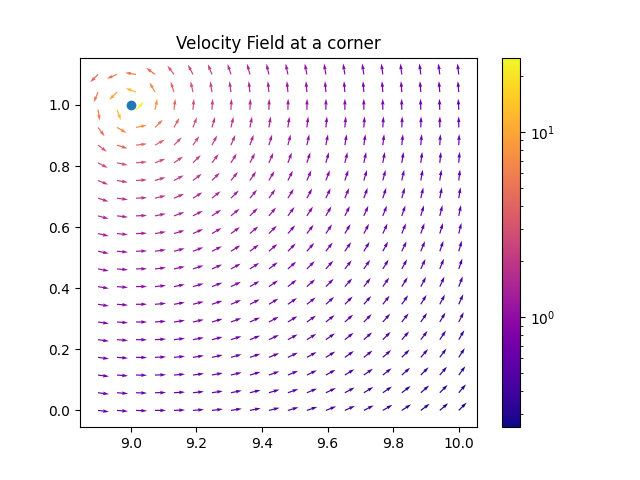

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

In [7]:
corner_vel = VortexManager(1, boundaries={
    'left': 0,
    'right': 10,
    'bottom': 0,
    'top': 10
})
v1 = corner_vel.add(9, 1, 1)

x = np.linspace(8.9, 10, 20)
y = np.linspace(0, 1.1, 20)

xs, ys = np.meshgrid(x, y)

fig, ax = plt.subplots()

vels = corner_vel.velocity_at(xs, ys, mirror_vortices=True)
norm = np.linalg.norm(vels, axis=0)
cs = ax.quiver(xs, ys, *vels/norm, norm, cmap='plasma', norm=colors.LogNorm())

ax.scatter(v1.x, v1.y)

ax.set_title('Velocity Field at a corner')
fig.colorbar(cs)

plt.show()

Here is the path of a particle started near one corner that is pushed around the boundary of a box formed by the limits of the graph (from 0 to 10 on both axes).

In [8]:
corner = VortexManager(1, boundaries={
    'left': 0,
    'right': 10,
    'bottom': 0,
    'top': 10
})
v1 = corner.add(1, 2, 1)

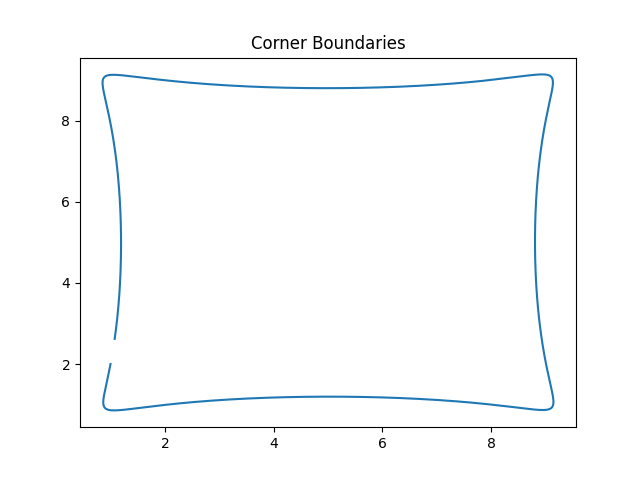

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

KeyError: 'modifiers'

In [9]:
dt = 1
x = np.linspace(0, 10, 50)
y = np.linspace(0, 10, 50)

# anim = animate(corner, x, y, dt, figsize=(6,6), duration=1000)
# anim.save('./corner_boundary.gif')

fig, ax = plt.subplots()
points = corner.step_forward(dt, 750)
ax.plot(*points[0])

plt.title('Corner Boundaries')
plt.show()

## Leapfrogging Vortices

We observe that vortices constructed on the corners of a square with opposite circulations on the top and bottom advect each other leftwards in a rather intereresting pattern.

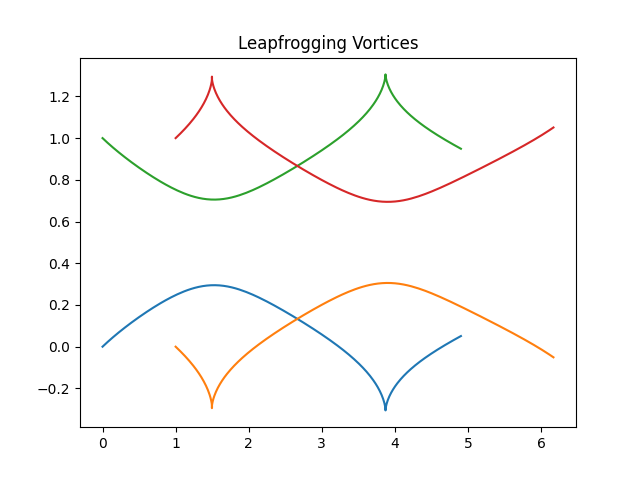

In [10]:
leapfrog = VortexManager(4)
b1 = leapfrog.add(0, 0, -1)
b2 = leapfrog.add(1, 0, -1)
t1 = leapfrog.add(0, 1, 1)
t2 = leapfrog.add(1, 1, 1)

dt = 0.1
x = np.linspace(-1, 2, 30)
y = np.linspace(-1, 5, 60)

# anim = animate(leapfrog, y, x, dt, figsize=(10, 5), duration=200)
# anim.save('./leapfrogging.gif')

fig, ax = plt.subplots()
points = leapfrog.step_forward(dt, 260)
for point in points:
    ax.plot(*point)

plt.title('Leapfrogging Vortices')
plt.show()

If we perturb the location of one of the vortices even slightly, we see the trajectories are quickly pushed off course, showing the system is prone to chaotic behavior.

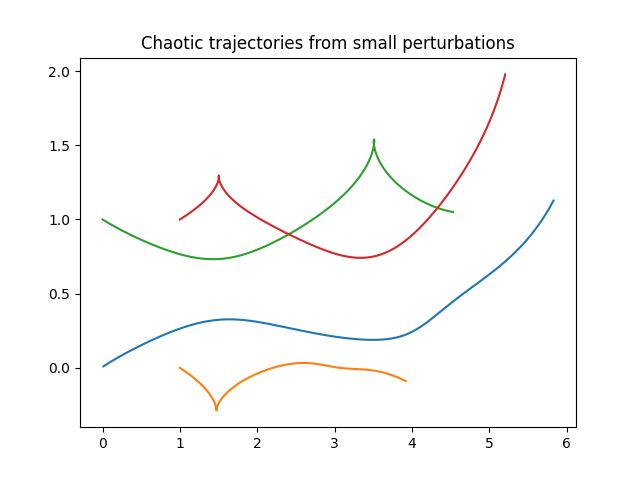

In [11]:
leapfrog2 = VortexManager(4)

# This one is just a little off!
b1 = leapfrog2.add(0.01, 0.01, -1)

b2 = leapfrog2.add(1, 0, -1)
t1 = leapfrog2.add(0, 1, 1)
t2 = leapfrog2.add(1, 1, 1)

dt = 0.1
x = np.linspace(-1, 2, 30)
y = np.linspace(-1, 5, 60)

# anim = animate(leapfrog, y, x, dt, figsize=(10, 5), duration=200)
# anim.save('./leapfrogging.gif')

fig, ax = plt.subplots()
points = leapfrog2.step_forward(dt, 260)
for point in points:
    ax.plot(*point)

plt.title('Chaotic trajectories from small perturbations')

plt.show()

# Appendix: Code

I may have gotten a little carried away here and I found it easier to start a whole package. The key code is in `tangential_vel` and `velocity_from_vortex` for computing velocities. `advect` is used to move the vortices around, and `step_forward` is a utility function I use to trace the path of the vortices in the graphs above. Mirror vortices for boundaries are calculated in `mirror_vortices`. The second file, `anim_util.py` just has some helper methods for creating cool animations, but none of those ended up in this main homework file, although I may attach some of them to the submission because they look cool. There are one or two other files but those are mostly just boilerplate to make the package work.

Sorry there aren't more comments and some of the docstrings are missing.

## Vortex / VortexManager

In [12]:
from IPython.display import Code

Code(filename='./src/hw5/vortex.py')

from __future__ import annotations

import numpy as np
from numpy.typing import ArrayLike, NDArray

from typing import Dict, Set

def tangential_vel(r, circulation, zero_cutoff=1e-10):
    """Compute the tangential component of velocity away from a vortex
    
    Args:
        r: The radius away from the vortex center
        circulation: The circulation of the vortex
        zero_cutoff: The tolerance under which to treat the radius as zero
        
    Returns:
        The tangential component of velocity at a distance `r` from a vortex
        with circulation `circulation`.
    """
    # TODO: I'm guessing this 'with' paradigm isn't very performant in loops
    with np.errstate(divide='ignore'):
        return np.where(r > 1e-10, circulation / (r * 2 * np.pi), 0)

def velocity_from_vortex(vortex_x, vortex_y, circulation, x, y):
    """
    Calculate the velocity at a point given the position and circulation of a
    vortex.

    Below: m is a scalar natural number, N is a (possibly) shape tuple, or a
    scalar.

    Args:
        vortex_x: (m,) x coordinates of vortices
        vortex_y: (m,) y coordinates of vortices
        circulation: (m,) circulations
        x: (N,) x points
        y: (N,) y points

    Returns:
        (2, N) matrix of velocities. In 2D, the first row is the x-coordinate,
        and the second row is the y-coordinate. If N is a shape tuple, then the
        first array contains the x-coordinates and the second the y-coordinates.
    """

    # Vectorize everything!
    vortex_x = np.atleast_1d(np.array(vortex_x))
    vortex_y = np.atleast_1d(np.array(vortex_y))
    circulation = np.atleast_1d(np.array(circulation))
    x = np.atleast_1d(np.array(x))
    y = np.atleast_1d(np.array(y))

    # x - vortex_x: (m, N)
    x_dist = x - vortex_x[(...,) + (np.newaxis,) * x.ndim]
    # y - vortex_y: (m, N)
    y_dist = y - vortex_y[(...,) + (np.newaxis,) * y.ndim]

    # (m, N) -> (m, N)
    distance = np.sqrt(x_dist**2 + y_dist**2)
    # dist: (m, N); circ: (m,) -> vel: (m, N)
    speed = tangential_vel(distance, circulation[(...,) + (np.newaxis,) * x.ndim])
    # (m, N) -> (m, N)
    angle = np.arctan2(y_dist, x_dist)
    # speed: (m, N); angle: (m, N) -cos/sin-> (2, m, N) -sum-> (2, N)
    return np.sum(speed * np.array([-np.sin(angle), np.cos(angle)]) / np.sqrt(2), axis=1)

class VortexManager:
    def __init__(self, default_size=1, max_deleted=10, boundaries=None):
        self.default_size = default_size
        self.max_deleted = max_deleted
        self.deleted: Set[int] = set()
        
        self.index_mapping: Dict[int, Vortex] = dict()

        # rows are coordinate axes, columns are coordinate pairs
        self.positions = np.zeros((2, default_size), dtype=float)
        self.circulations = 0 * np.ones(default_size, dtype=float)
        self.core_radii = np.zeros(default_size, dtype=float)
        self.end = 0

        # boundaries for mirror vortices
        self.boundaries = boundaries

    def add(self, x: float, y: float, circulation: float, core_radius=1, name="") -> Vortex:
        return Vortex(x, y, circulation, core_radius, name, manager=self)
        
    def ensure_space(self):
        if self.end == self.positions.shape[1]:
            self.positions = np.concat((self.positions, np.zeros_like(self.positions)), axis=1)
            self.circulations = np.concat((self.circulations, 0 * np.ones(len(self.circulations))))
            self.core_radii = np.concat((self.core_radii, np.zeros_like(self.core_radii)))
            
    def register(self, vortex: Vortex) -> int:
        # Ensure there is enough room in the arrays
        self.ensure_space()
        
        # Add to index mapping registry
        self.index_mapping[self.end] = vortex

        # This is kinda goofy: add 1 and then subtract it
        self.end += 1
        return self.end - 1
    
    def deregister(self, vortex: Vortex | int) -> int:
        if isinstance(vortex, int):
            pass
        else:
           

## anim_util

In [13]:
Code(filename='./src/hw5/anim_util.py')

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, colors

from functools import partial

from . import VortexManager

def update(frame, dt, xs, ys, field, positions, manager: VortexManager):
    """Update animation on each frame
    
    Args:
        frame: index of the frame being rendered
        ax: The axis on which the animation is plotted
        contour: The velocity field magnitude contour
        field: The velocity field directions quiver
        positions: The scatter plot of vortex positions
        m_positions: Positions of the mirror vortices
        manager: VortexManager for the vortices
    """

    manager.advect(dt, mirror_vortices=True)

    velocities = manager.velocity_at(xs, ys)
    norms = np.linalg.norm(velocities, axis=0)
    velocities /= norms

    field.set_UVC(*velocities, norms)
    # positions = manager.plot_positions(ax, color='r')
    positions.set_offsets(manager.positions.T)
    # m_positions.set_offsets(manager.mirror_vortices().positions.T)
    
    return dt, xs, ys, field, positions, manager

def animate(manager, grid_x, grid_y, dt, figsize=(6,6), save_loc=None, duration=None, **kwargs):
    # matplotlib.use('tkagg')
    fig, ax = plt.subplots(figsize=figsize)

    xs, ys = np.meshgrid(grid_x, grid_y)

    vel_field = manager.velocity_at(xs, ys)
    norms = np.linalg.norm(vel_field, axis=0)

    vel_field /= norms

    field = ax.quiver(xs, ys, *vel_field, norms, cmap='plasma', norm=colors.LogNorm(), angles='xy', scale_units='xy', units='xy', minshaft=2, pivot='tail')
    positions = manager.plot_positions(ax, color='tab:red')
    
    # Set some defaults for animation arguments
    kwargs['repeat'] = kwargs.get('repeat', False)
    kwargs['cache_frame_data'] = kwargs.get('cache_frame_data', False)
    kwargs['interval'] = kwargs.get('interval', 50)
    
    if duration is not None:
        kwargs['frames'] = np.arange(duration)

    anim = animation.FuncAnimation(
        fig,
        partial(update, dt=dt, xs=xs, ys=ys, field=field, positions=positions,  manager=manager),
        **kwargs
    )

    # if save_loc is not None:
    #     anim.save(save_loc)
    # else:
    #     plt.show(block=True)
    
    return anim

KeyError: 'modifiers'